# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

## Table of Content

1. Import Libraries

2. Setting options

3. Data loading and Data Analysis 

4. Visualize and Standardize the data

5. Model Building

6. Evaluate Model

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [ ]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.4.1


## 2. Setting Options

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

### Read images and save the pixel information to an array. Also, save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0). Resize the images to shape (128, 128, 3).

In [ ]:
os.chdir("/content/drive/MyDrive/cnn data")
from zipfile  import ZipFile
with ZipFile('/content/drive/MyDrive/cnn data/mobile-images-20210416T092002Z-001.zip','r') as z:
  z.extractall()

In [ ]:
import cv2
no_dir = "/content/drive/MyDrive/cnn data/mobile-images/no-mobile"
yes_dir = "/content/drive/MyDrive/cnn data/mobile-images/yes-mobile"
nophone = os.listdir(no_dir)
yesphone = os.listdir(yes_dir)

In [ ]:
yesphone[0]

'img224.png'

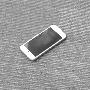

In [ ]:
from google.colab.patches import cv2_imshow
yes_img = cv2.imread(yes_dir + "/img244.png")
cv2_imshow(yes_img)

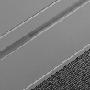

In [ ]:
from google.colab.patches import cv2_imshow
no_img = cv2.imread(no_dir + "/img95.png")
cv2_imshow(no_img)

### Check shape and size of the images

In [ ]:
print(yes_img.shape)
print(no_img.shape)

(90, 90, 3)
(90, 90, 3)


###  What is the percentage of images with and without mobile phone in the data

In [ ]:
len_yes = len(yesphone)
len_no = len(nophone)
print("Percentage of images with phone")
print((len_yes/(len_yes+len_no))*100)
print("Percentage of images with no phone")
print((len_no/(len_yes+len_no))*100)

Percentage of images with phone
50.61224489795918
Percentage of images with no phone
49.38775510204081


### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [ ]:
yesimg = []
y_yes = []

for img in yesphone:
  a = cv2.imread(yes_dir + "/" + img)
  yesimg.append(a)
  y_yes.append(1)

In [ ]:
print( "No of images", len(yesimg))
print(yesimg[0].shape)
print('Length of Label', len(y_yes))

No of images 124
(90, 90, 3)
Length of Label 124


In [ ]:
noimg = []
y_no = []

for img in nophone:
  a = cv2.imread(no_dir + "/" + img)
  noimg.append(a)
  y_no.append(0)

print( "No of images", len(noimg))
print( yesimg[0].shape)
print( "Length of Label", len(y_no))

No of images 121
(90, 90, 3)
Length of Label 121


In [ ]:
# Concantenate

Y = np.concatenate((y_yes,y_no), axis =0)
Y.shape

(245,)

In [ ]:
x = np.concatenate((yesimg,noimg), axis =0)
x.shape

(245, 90, 90, 3)

In [ ]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

### Shuffle the above data and labels ( Data and label should be in sync)

In [ ]:
from sklearn.utils import shuffle
x,Y = shuffle (x,Y)

In [ ]:
Y

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0])

## 4. Visualize and Standardize the data

### Visualise the first 10 images in the data and print their corresponding labels.

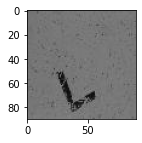

No Phone


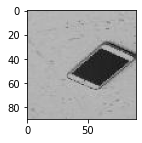

Phone


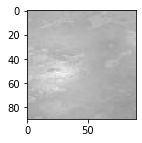

No Phone


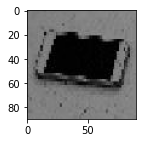

Phone


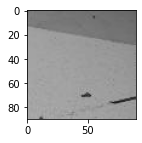

No Phone


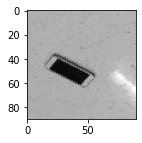

Phone


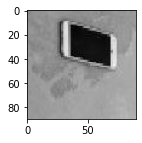

Phone


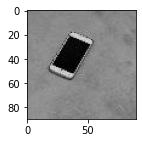

Phone


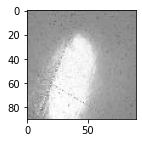

No Phone


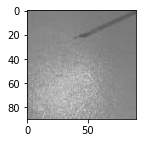

No Phone


In [ ]:
import matplotlib.pyplot as plt
for i in range(10): 
  plt.figure(figsize=(2,2))
  plt.imshow(x[i], cmap='gray')
  plt.show()
  print("No Phone" if Y[i] == 0 else "Phone")

### Split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size =0.3, random_state =4)

### Print shape of the X train and X test data

In [ ]:
print(x_train.shape, Y_train.shape)
print(x_test.shape, Y_test.shape)

(171, 90, 90, 3) (171,)
(74, 90, 90, 3) (74,)


### Normalize the data by dividing by 255

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_test, num_classes=2)

## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten , MaxPooling2D

epochs = 30
filters  =32
kernel_size = (3,3)
input_shape = x_train[0].shape[0:]
batch_size =32

model = Sequential()
model.add(Conv2D(filters = filters, kernel_size =kernel_size, input_shape =input_shape, activation ='relu' ))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters = filters*2, kernel_size = (5,5), activation ='relu' ))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))


### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 88, 88, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 40, 40, 64)        51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                1638464   
_________________________________________________________________
dense_9 (Dense)              (None, 2)                

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [ ]:
history = model.fit(x_train, Y_train ,batch_size=batch_size, epochs=50,verbose=1,validation_data=(x_test, Y_test))

Epoch 1/50
6/6 [==============================] - 1s 52ms/step - loss: 1.4717 - accuracy: 0.4883 - val_loss: 0.6937 - val_accuracy: 0.5135
Epoch 2/50
6/6 [==============================] - 0s 22ms/step - loss: 0.6921 - accuracy: 0.5265 - val_loss: 0.6744 - val_accuracy: 0.4865
Epoch 3/50
6/6 [==============================] - 0s 22ms/step - loss: 0.6448 - accuracy: 0.5776 - val_loss: 0.6300 - val_accuracy: 0.4595
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 0.5448 - accuracy: 0.7005 - val_loss: 0.5980 - val_accuracy: 0.6081
Epoch 5/50
6/6 [==============================] - 0s 22ms/step - loss: 0.4469 - accuracy: 0.8114 - val_loss: 0.5597 - val_accuracy: 0.7973
Epoch 6/50
6/6 [==============================] - 0s 20ms/step - loss: 0.3253 - accuracy: 0.9061 - val_loss: 0.5153 - val_accuracy: 0.8108
Epoch 7/50
6/6 [==============================] - 0s 20ms/step - loss: 0.2742 - accuracy: 0.9484 - val_loss: 0.4624 - val_accuracy: 0.8378
Epoch 8/50
6/6 [===========

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [ ]:
score =model.evaluate(x_test, Y_test)
print('Test score', score[0])
print('Test Aaccuracy', score [1])

3/3 [==============================] - 0s 5ms/step - loss: 1.4422 - accuracy: 0.8378
Test score 1.4422295093536377
Test Aaccuracy 0.837837815284729


### Predict label data of the test data and check confusion matrix

In [ ]:
prediction = np.argmax(model.predict(x_test), axis =1)
Y_test = np.argmax(Y_test, axis= 1)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test,prediction))
print(classification_report(Y_test,prediction))

[[34  4]
 [ 8 28]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        38
           1       0.88      0.78      0.82        36

    accuracy                           0.84        74
   macro avg       0.84      0.84      0.84        74
weighted avg       0.84      0.84      0.84        74



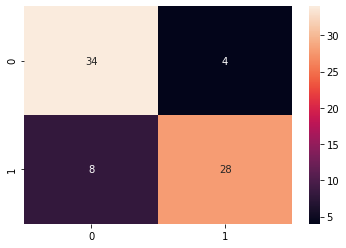

In [ ]:
import seaborn as sns


sns.heatmap(confusion_matrix(Y_test, prediction), annot=True)
plt.show()

### Display test images and their predicted label for a few samples

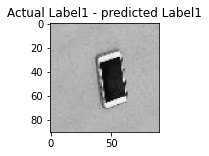

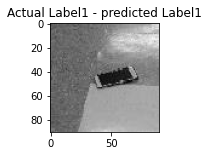

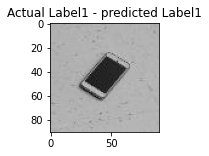

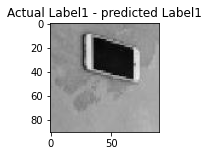

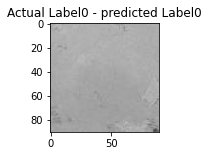

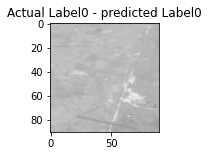

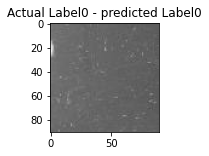

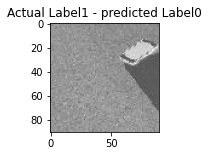

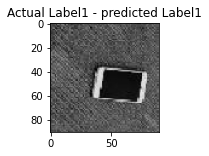

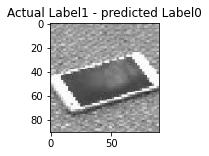

In [ ]:
for i in range (10):
 plt.figure(figsize =(2,2))
 plt.imshow(x_test[i],cmap='gray')
 plt.title("Actual Label{} - predicted Label{}". format(Y_test[i], prediction[i]))
 plt.show()

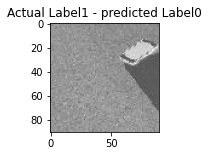

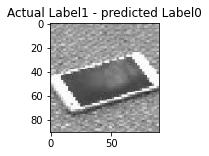

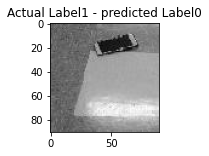

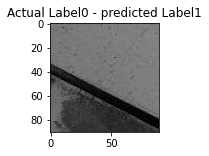

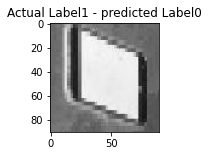

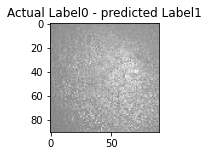

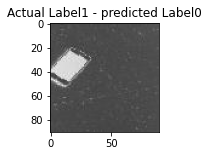

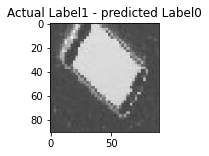

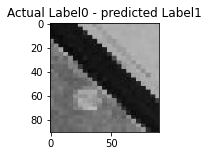

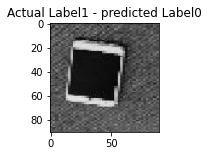

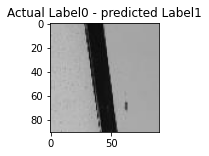

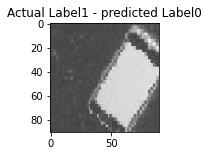

In [ ]:
for i in range (len(Y_test)):
  if Y_test[i] != prediction[i]:
   plt.figure(figsize =(2,2))
   plt.imshow(x_test[i],cmap='gray')
   plt.title("Actual Label{} - predicted Label{}". format(Y_test[i], prediction[i]))
   plt.show()

### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

<Figure size 432x288 with 0 Axes>

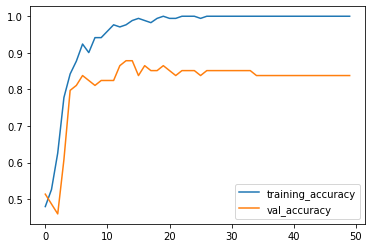

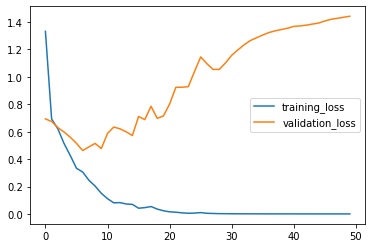

<Figure size 432x288 with 0 Axes>

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(training_accuracy))

plt.plot(epochs , training_accuracy, label = 'training_accuracy')
plt.plot(epochs , validation_accuracy, label = 'val_accuracy')
plt.legend()
plt.figure()

plt.plot(epochs , training_loss, label = 'training_loss')
plt.plot(epochs , validation_loss, label = 'validation_loss')
plt.legend()
plt.figure()

## 7.  Conclusion and Interpretation

### Write your observations and findings

## There was 2 classes for mobile classification
## Test data accuracy was almost 90% whereas training accuracy was 100% i.e. Model is overfitted. 

##Improvement - 
1.Data Augmentation
2. Hyper parameter tuning
3. Changing Model architechture (Adding dropout layer, more dense layers , introducing padding )

## 8. Further Explore

### Try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the previous network